In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

In [2]:
n_train = 20
n_test = 100
num_inputs = 200
true_w = nd.ones((num_inputs, 1))* 0.01
true_b = 0.05

features = nd.random.normal(shape=(n_train+n_test, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features = features[:n_train, :]
test_features = features[n_train:, :]
train_labels = labels[:n_train]
test_labels = labels[n_train:]

In [3]:
#init parameters
def init_params():
    w = nd.random.normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    w.attach_grad()
    b.attach_grad()
    return [w, b]

In [4]:
#define penalty
def l2_penalty(w):
    return (w**2).sum() / 2

In [5]:
#define fit and train
batch_size = 1
num_epochs = 100
lr = 0.003
net = d2l.linreg
loss = d2l.squared_loss
train_iter = gdata.DataLoader(gdata.ArrayDataset(
    train_features, train_labels), batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls =[]
    test_ls = []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b),
                            train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b),
                           test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs+1), train_ls, 'epochs', 'loss',
                range(1, num_epochs+1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().asscalar())

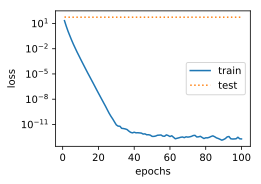

L2 norm of w: 11.611942


In [6]:
fit_and_plot(lambd=0)

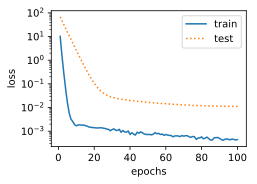

L2 norm of w: 0.042195294


In [7]:
fit_and_plot(lambd=3)